# UV-VIS Spectroscopy Analysis

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Set the path to the foldercontaining text files
folder_path = "C:\\Users\\w16025698\\OneDrive - Northumbria University - Production Azure AD\\PhD\\Characterisation\\UV-VIS\\221115"
file_name_T = "221110Asel T.txt"
file_name_R = "221110Asel R.txt"
file_title = file_name_T.replace(' T.txt', '')

# Read the data from the text file, skipping the first 12 lines
data_T = np.loadtxt(os.path.join(folder_path, file_name_T), delimiter=',', skiprows=2)
data_R = np.loadtxt(os.path.join(folder_path, file_name_R), delimiter=',', skiprows=2)


# Extract data
T = data_T[:,1]
R = data_R[:,1]
WL_T = data_T[:,0] # wavelength
WL_R = data_R[:,0] # wavelength

t = 8.76E-07 # film thickness

## Transmission Absorption Spectra

Text(0.5, 1.0, '221110Asel')

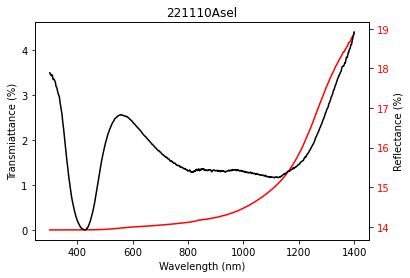

In [2]:
fig, ax1 = plt.subplots()

ax1.plot(WL_T, T, label='Transmittance', color='red')
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('Transmiattance (%)')

ax2 = ax1.twinx()
ax2.plot(WL_R, R, label='Reflectance', color='k')
ax2.set_ylabel('Reflectance (%)')
ax2.tick_params(axis='y', labelcolor='red')
plt.title(file_title)

## Tauc $\alpha h \nu^2$ Plot

The x-axis intercept is 0.98 eV


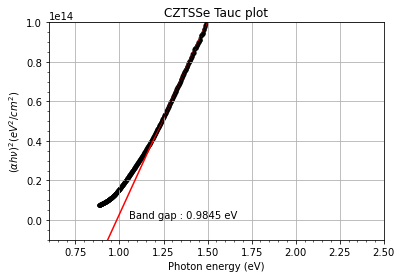

In [7]:
def calculate_alpha(T, R, t, WL):
    # Find indices of T that are non-zero
    nonzero_indices = np.where(T != 0)

    # Initialize alpha array with zeros
    alpha = np.zeros_like(T)

    # Calculate alpha for non-zero values of T
    alpha[nonzero_indices] = (1/t) * np.log((1-(R[nonzero_indices]/100))**2 / (T[nonzero_indices]/100))
    
    # Calculate hv
    hv = 1237.5 / WL[nonzero_indices]
    
    # alpha hv squared
    ahv2 = (alpha[nonzero_indices]*hv)**2

    return ahv2, hv

ahv2, hv = calculate_alpha(T,R,t,WL_T)

### Tauc Plot figure ###
fig, ax = plt.subplots()

# Setting limits of the linear fit
x_min = 1.25
x_max = 1.5
mask = np.logical_and(hv >= x_min, hv <= x_max)
hv_subset = hv[mask]
ahv2_subset = ahv2[mask]

# Fit line of best fit
coefficients = np.polyfit(hv_subset, ahv2_subset, 1)
poly_func = np.poly1d(coefficients)
line_x = np.linspace(x_min-0.5, x_max, 100)  # Only include values between set values
line_y = poly_func(line_x)

# Calculate x-axis intercept
x_intercept = -coefficients[1] / coefficients[0]
print(f"The x-axis intercept is {x_intercept:.2f} eV")

# Plot line of best fit
ax.plot(line_x, line_y, label='Tangent', color='r')
# Plot Tauc plot
ax.plot(hv, ahv2, color='k')
ax.scatter(hv, ahv2, label='Tauc plot', c='k', marker='o', alpha=0.8, s=10)

# Plot X intercept
#ax.plot(x_intercept, 0, 'ro')
ax.set_xlabel('Photon energy (eV)')
ax.set_ylabel('$(\\alpha h\\nu)^2 (eV^2/cm^2)$')
ax.set_xlim(0.6, 2.5)  # Set x-axis limits nanoparticles
ax.set_ylim(-1E13, 1E14) # Set y-axis limits nanoparticles
#ax.set_xlim(0.6, 2.5)  # Set x-axis limits Selenise
#ax.set_ylim(-0.01E15, 0.1E15) # Set y-axis limits Selenise
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5E13))
ax.grid()
#ax.legend()
plt.title('CZTSSe' + ' Tauc plot')

# Add Egap as text onto the figure
ax.text(0.4, 0.1, "Band gap : {:.4f} eV".format(x_intercept), 
        transform=ax.transAxes, fontsize=10, ha='center')

# Figure save settings
save_dir = os.path.join(folder_path, 'UVVIS Plots')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
plt.savefig(os.path.join(save_dir, file_title + 'Tauc plot.png'), dpi=300)


The x-axis intercept is 1.21 eV


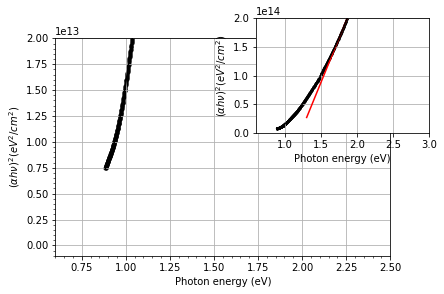

In [6]:
### Tauc Plot figure ###
fig, ax = plt.subplots()

# Setting limits of the linear fit
x_min = 1.8
x_max = 1.9
mask = np.logical_and(hv >= x_min, hv <= x_max)
hv_subset = hv[mask]
ahv2_subset = ahv2[mask]

# Fit line of best fit
coefficients = np.polyfit(hv_subset, ahv2_subset, 1)
poly_func = np.poly1d(coefficients)
line_x = np.linspace(x_min-0.5, x_max, 100)  # Only include values between set values
line_y = poly_func(line_x)

# Calculate x-axis intercept
x_intercept = -coefficients[1] / coefficients[0]
print(f"The x-axis intercept is {x_intercept:.2f} eV")

# Plot line of best fit
ax.plot(line_x, line_y, label='Tangent', color='r')
# Plot Tauc plot
ax.plot(hv, ahv2, color='k')
ax.scatter(hv, ahv2, label='Tauc plot', c='k', marker='o', alpha=0.8, s=10)

# Plot X intercept
#ax.plot(x_intercept, 0, 'ro')
ax.set_xlabel('Photon energy (eV)')
ax.set_ylabel('$(\\alpha h\\nu)^2 (eV^2/cm^2)$')
ax.set_xlim(0.6, 2.5)  # Set x-axis limits nanoparticles
ax.set_ylim(-0.1E13, 0.2E14) # Set y-axis limits nanoparticles
#ax.set_xlim(0.6, 2.5)  # Set x-axis limits Selenise
#ax.set_ylim(-0.01E15, 0.1E15) # Set y-axis limits Selenise
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05E13))
ax.grid()
#ax.legend()
#plt.title(file_title + ' Tauc plot')

# Create a second axes for the additional plot in the top right corner
ax2 = fig.add_axes([0.59, 0.55, 0.4, 0.4])  # Adjust the position and size as needed

ax2.set_xlabel('Photon energy (eV)')
ax2.set_ylabel('$(\\alpha h\\nu)^2 (eV^2/cm^2)$')
ax2.set_xlim(0.6, 3)  # Set x-axis limits nanoparticles
ax2.set_ylim(-0.1E13, 2E14) # Set y-axis limits nanoparticles
#ax.set_xlim(0.6, 2.5)  # Set x-axis limits Selenise
#ax.set_ylim(-0.01E15, 0.1E15) # Set y-axis limits Selenise
#ax2.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
#ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.05E13))
# Plot line of best fit
ax2.plot(line_x, line_y, label='Tangent', color='r')
# Plot Tauc plot
ax2.plot(hv, ahv2, color='k')
ax2.scatter(hv, ahv2, label='Tauc plot', c='k', marker='o', alpha=0.8, s=2)
ax2.grid()

## Calculate n and k data